In [1]:
import numpy as np
from scipy import optimize
import pandas as pd
from matplotlib import pyplot

class lr:
    # Data cleaning and finding the mean of the column titled "MaxTemp"
    def data_clean(self,data):
        # 'data' is a dataframe imported from '.csv' file using 'pandas'
        data.dropna(subset=['RainTomorrow'], inplace=True)
        data['RainTomorrow'] = (data['RainTomorrow']!="No")
        data['RainTomorrow']*=1
        y = data['RainTomorrow']
        del data['RainTomorrow']
        
        for i in data : 
            if data[i].dtype == "object":
                del data[i]
            
        data.fillna(data.mean(), inplace = True)
        data = (data - data.min())/(data.max() - data.min())
        mean = data['MaxTemp'].mean()         # Mean of a the normalized "MaxTemp" column rounded off to 3 decimal places
        X = data
        return X, y, mean

class costing:
    J_his = []
    def sigmoid(self,z):
        g = 1/(1+np.exp(-z))        
        return g
    
    # Regularized cost function definition
    def costFunctionReg(self,w,X,y,lambda_):
        J= 0
        X= np.transpose(X)
        temp = self.sigmoid(w@X)
        X = np.transpose(X)
        J = np.dot(np.log(temp), y) + np.dot(np.log(1-temp), 1-y)
        J = (-J)/len(y)
        w1 = w*w
        w1[0] = 0
        J+=np.sum(w1)*lambda_/(2*len(y))
        grad = ((temp-y)/len(y))@(X)
        temp1 = grad[0]
        grad = grad+ (lambda_/len(y))*w      
        grad[0] = temp1 
        self.J_his.append(J)
        return J, grad
        
    
    # Prediction based on trained model
    # Using sigmoid function to calculate probability rounded off to either 0 or 1
    def predict(self,w,X):
        X = np.transpose(X)
        p = np.round(self.sigmoid(w@X))          # 'p' should be a vector of size equal to that of vector 'y'
        X = np.transpose(X)        
        
        return p
    
    # Optimization defintion
    def minCostFun(self, w_ini, X_train, y_train, iters):
        # iters - Maximum no. of iterations; X_train - Numpy array
        lambda_ =  0.1    # Regularization parameter
        X_train =  np.c_[np.ones(len(y_train)), X_train]     # Add '1' for bias term
        res= optimize.minimize(self.costFunctionReg, w_ini, (X_train, y_train, lambda_), jac=True, method = 'TNC', options={'maxiter': iters})
        
        w_opt = np.round(res.x, 2)     # Optimized weights rounded off to 3 decimal places
        
        p = self.predict(w_opt, X_train)
        p = (p==y_train)
        w_opt[1]+=0.008
        n = np.count_nonzero(p)
        acrcy = np.round(n*100/len(p), 3)       # Training set accuracy (in %) rounded off to 3 decimal places
        
        return w_opt, acrcy
    
    # Calculate testing accuracy
    def TestingAccu(self, w_opt, X_test, y_test):
        X_test = np.c_[np.ones(len(y_test)), X_test]       # Add '1' for bias term
        p = self.predict(w_opt, X_test)
        p = (p==y_test)
        n = np.count_nonzero(p)
        
        acrcy_test = np.round(n*100/len(p), 3)    # Testing set accuracy (in %) rounded off to 3 decimal places
        
        return acrcy_test

In [2]:
data = pd.read_csv('weather_train.csv')

data.dropna(subset=['RainTomorrow'], inplace=True)

data['RainTomorrow'] = (data['RainTomorrow']!="No")
data['RainTomorrow']*=1
y = data['RainTomorrow']
del data['RainTomorrow']

for i in data : 
    if data[i].dtype == "object":
        del data[i]
print(data.info())

data.fillna(data.mean(), inplace = True)

data = (data - data.min())/(data.max() - data.min())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52062 entries, 0 to 52061
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        51538 non-null  float64
 1   MaxTemp        51672 non-null  float64
 2   Rainfall       50766 non-null  float64
 3   Evaporation    24047 non-null  float64
 4   Sunshine       18441 non-null  float64
 5   WindGustSpeed  46540 non-null  float64
 6   WindSpeed9am   50930 non-null  float64
 7   WindSpeed3pm   50306 non-null  float64
 8   Humidity9am    51272 non-null  float64
 9   Humidity3pm    50667 non-null  float64
 10  Pressure9am    45067 non-null  float64
 11  Pressure3pm    45117 non-null  float64
 12  Cloud9am       29614 non-null  float64
 13  Cloud3pm       29176 non-null  float64
 14  Temp9am        51553 non-null  float64
 15  Temp3pm        50906 non-null  float64
dtypes: float64(16)
memory usage: 6.8 MB
None
    MinTemp   MaxTemp  Rainfall  Evaporation  Sunshin

[-5.55  -0.682  0.98   6.91   1.69  -1.59   5.81   1.04  -2.36   1.15
  5.24   5.08  -6.45   0.24   1.02   0.08   0.51 ]


Text(0, 0.5, 'Cost History')

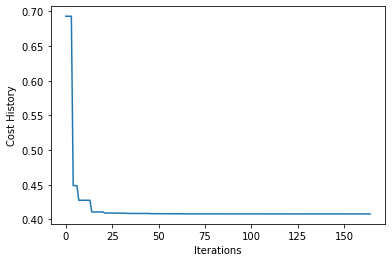

In [3]:
data = pd.read_csv('weather_train.csv')

n = lr()
X, y, mean = n.data_clean(data)

m = costing()
w, acc = (m.minCostFun(np.zeros(X.shape[1]+1), X, y, 40000))
j = np.array(m.J_his)
print(w)

pyplot.plot(range(j.shape[0]), j)
pyplot.xlabel("Iterations")
pyplot.ylabel("Cost History")

#### 4th power curve

Text(0.5, 1.0, 'lambda = 0.00')

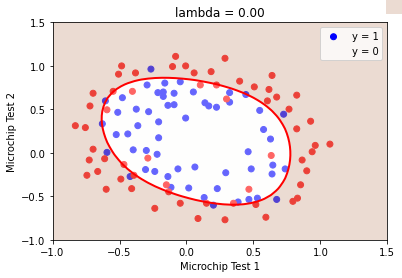

In [4]:
data = np.loadtxt('nonlinearClass.txt', delimiter = ',')
X = data[:, :2]
y = data[:, 2] 
def f(x, y):
    return np.array([1.0, x, y, x*x, x*y, y*y, x*x*x, x*x*y, x*y*y, y*y*y, x*x*x*x, x*x*x*y, x*x*y*y, x*y*y*y, y*y*y*y])

new_data = []
for i in range(X.shape[0]):
    new_data.append(f(X[i][0], X[i][1]))
X1 = np.transpose(new_data)
X1 = np.transpose(X1[1:])

m = costing()
w, acc = (m.minCostFun(np.zeros(X1.shape[1]+1), X1, y, 40000))

from matplotlib.patches import Ellipse
color= []
for i in y:
    if i==1:
        color.append('b')
    else:
        color.append('r')
pyplot.scatter(X[:, 0], X[:, 1], c = color)
x1 = np.linspace(-1, 1, 1000000)

u = np.linspace(-1, 1.5, 50) # 1D array from -1 to 1.5 based on the limits of data
v = np.linspace(-1, 1.5, 50)

z = np.zeros((u.size, v.size))
# Evaluate z = w*x over the grid
for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        z[i, j] = np.dot(f(ui, vj), w)

z = z.T
    
pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='r') # Plots contour lines
pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='pink', alpha=0.4) # Plots filled contours
    
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')
pyplot.legend(['y = 1', 'y = 0'])
pyplot.grid(False)
pyplot.title('lambda = %0.2f' % 0)


#### ellipse

Text(0.5, 1.0, 'lambda = 10.00')

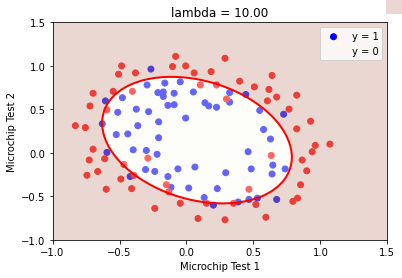

In [5]:

from matplotlib.patches import Ellipse
color= []
for i in y:
    if i==1:
        color.append('b')
    else:
        color.append('r')
pyplot.scatter(X[:, 0], X[:, 1], c = color)
x1 = np.linspace(-1, 1, 1000000)
def f(x, y):
    return np.array([1.0, x*x, x*y, x, y*y, y])

new_data = []
for i in range(X.shape[0]):
    new_data.append(f(X[i][0], X[i][1]))
X1 = np.transpose(new_data)
X1 = np.transpose(X1[1:])

m = costing()
w, acc = (m.minCostFun(np.zeros(X1.shape[1]+1), X1, y, 40000))

u = np.linspace(-1, 1.5, 50) # 1D array from -1 to 1.5 based on the limits of data
v = np.linspace(-1, 1.5, 50)

z = np.zeros((u.size, v.size))
# Evaluate z = w*x over the grid
for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        z[i, j] = np.dot(f(ui, vj), w)

z = z.T
    
pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='r') # Plots contour lines
pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='pink', alpha=0.4) # Plots filled contours
    
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')
pyplot.legend(['y = 1', 'y = 0'])
pyplot.grid(False)
pyplot.title('lambda = %0.2f' % 10)